# HOMEWORK: YELP REVIEW TEXT

In this notebook, we will be attempting to classify Yelp Reviews into 1 star or 5 star categories based off the text content in the reviews.

We will use the Yelp Review Dataset.

Each observation in this dataset is a review of a particular business by a particular user.

The "stars" column is the number of stars (1 through 5) assigned by the reviewer to the business (i.e., the rating of the business by the person who wrote the review).  Higher stars is better.

The "cool" column is the number of "cool" votes this review received from other Yelp users.

All reviews start with 0 "cool" votes, and there is no limit to how many "cool" votes a review can receive.  Basically, a "cool" vote is a rating of the review itself, not a rating of the business.

The "useful" and "funny" columns are similar to the "cool" column.

## TASK 1: Read yelp.csv into a DataFrame

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
path = "yelp.csv"
df_yelp = pd.read_csv(path)
print(df_yelp.shape)
df_yelp.head()

(10000, 10)


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


## TASK 2: Perform some EDA on the DataFrame

Know your data before performing any feature engineering or machine learning on it.

In [3]:
df_yelp.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [4]:
df_yelp.describe().T

,count,mean,std,min,25%,50%,75%,max
stars,10000.0,3.7775,1.214636,1.0,3.0,4.0,5.0,5.0
cool,10000.0,0.8768,2.067861,0.0,0.0,0.0,1.0,77.0
useful,10000.0,1.4093,2.336647,0.0,0.0,1.0,2.0,76.0
funny,10000.0,0.7013,1.907942,0.0,0.0,0.0,1.0,57.0


In [5]:
df_yelp['text_length'] = df_yelp['text'].apply(len)
df_yelp.head(3)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,895
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1349
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


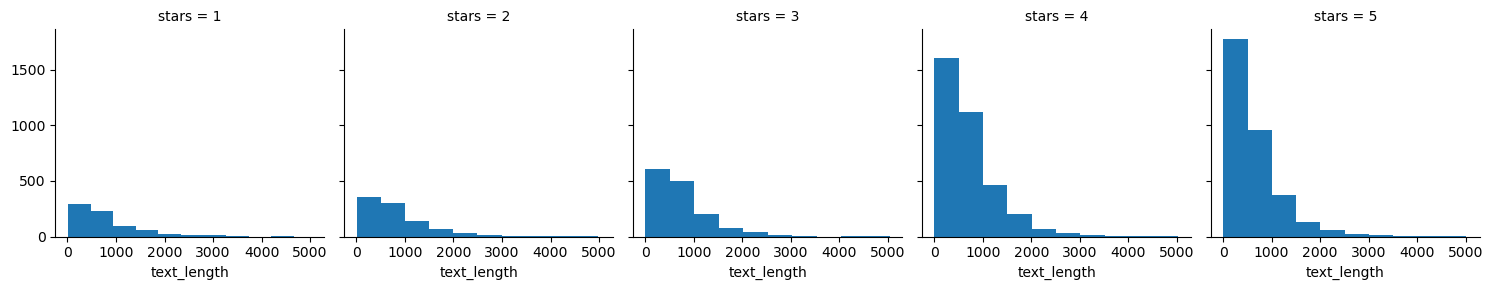

In [6]:
g = sns.FacetGrid(data=df_yelp, col='stars')
g.map(plt.hist, 'text_length')

<Axes: xlabel='stars', ylabel='text_length'>

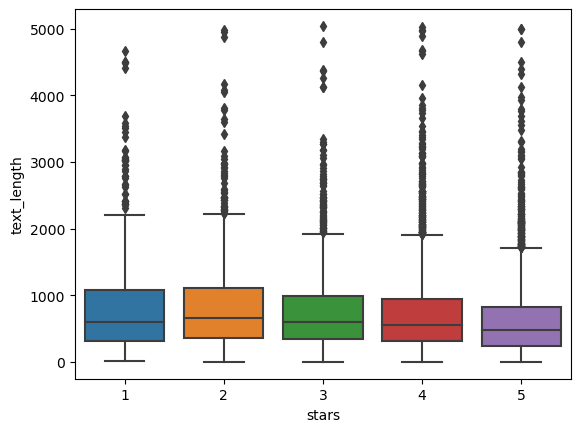

In [7]:
sns.boxplot(x='stars', y='text_length', data=df_yelp)

* From the 1st graph, we can see that there are some outliers for text-length in stars=1 and stars=3 group. 
* Text length is going up to as high as 4000-5000 characters. 
* From the 2nd graph, we can see that the median text length for all star labels is approximately the same.

<Axes: xlabel='count', ylabel='stars'>

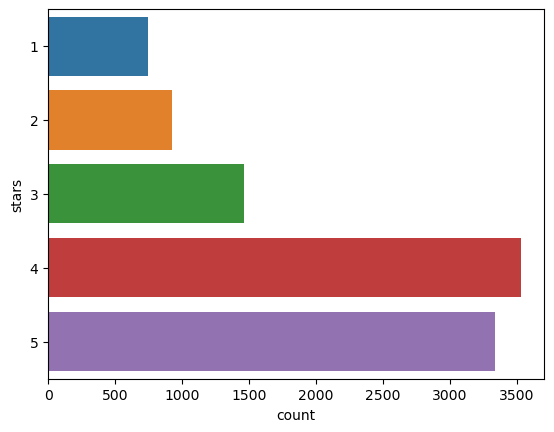

In [8]:
sns.countplot(y='stars', data=df_yelp)  # the 4 star ratings top the charts in the dataset
# thinking about the ML models to use and metics to evaluate model? 
# Not accuracy, why? because the data is not balanced. 

#### Use groupby to get the mean values of the numerical columns

In [9]:
df_stars = df_yelp.groupby('stars').mean(numeric_only=True)
df_stars
# group by stars to then use a correleation matrix

,cool,useful,funny,text_length
stars,,,,
1,0.576769,1.604806,1.056075,830.244326
2,0.719525,1.563107,0.875944,846.249191
3,0.788501,1.306639,0.694730,762.325120
4,0.954623,1.395916,0.670448,716.493193
5,0.944261,1.381780,0.608631,627.976925


In [10]:
# correlation matrix 
df_stars.corr()


,cool,useful,funny,text_length
cool,1.000000,-0.743329,-0.944939,-0.856995
useful,-0.743329,1.000000,0.894506,0.698743
funny,-0.944939,0.894506,1.000000,0.842585
text_length,-0.856995,0.698743,0.842585,1.000000


#### We can represent this correlation using a heat map, which will make it look much more interesting

<Axes: >

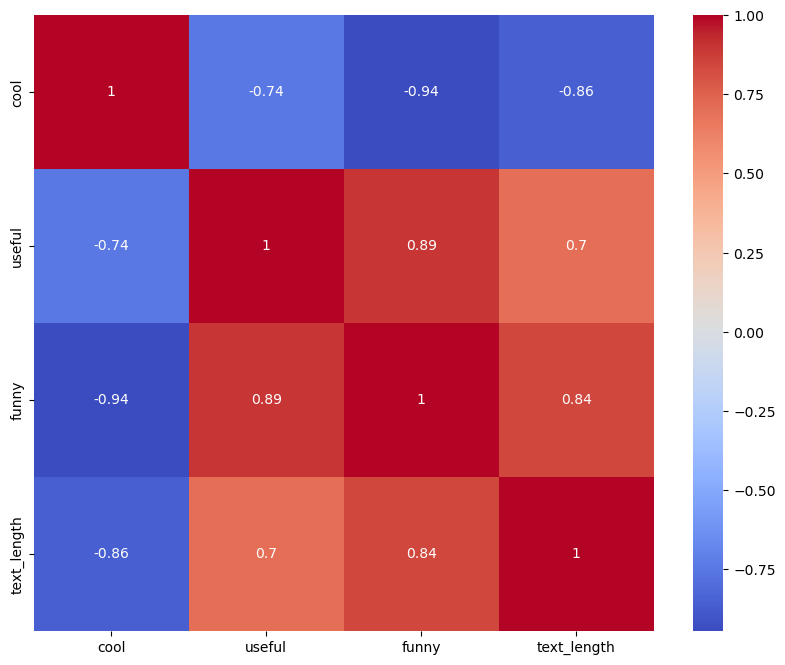

In [11]:
# correlation heat map 
# we are looking for co-linearity between features
plt.figure(figsize=(10, 8))
sns.heatmap(df_stars.corr(), cmap='coolwarm', annot=True)

# This is a N by N matirix, ignore the ones.

# N by M martix is different.
# useful and funny have the same impact on the model. So why not get rid of one. 
# why bring in two features that do the same thing. The model doesnt need extra dimensons. 


## TASK 3: Create a new DataFrame that only contains the 5-star and 1-star reviews

In [12]:
df_yelp_best_worst = df_yelp[(df_yelp.stars==5) | (df_yelp.stars==1)]
print(df_yelp_best_worst.shape)
df_yelp_best_worst.head()

(4086, 11)


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text_length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,895
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1349
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,423
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,471
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1571


<Axes: xlabel='stars', ylabel='count'>

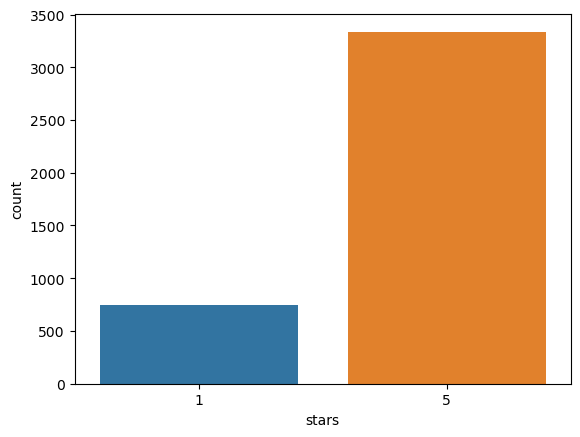

In [13]:
sns.countplot(x=df_yelp_best_worst['stars'], label="Count") 

This is an imbalanced dataset.  The imbalance between the positives and negatives is almost in the ratio of 4.5 : 1.

In [14]:
df_yelp_best_worst['stars'].value_counts()
# null accuracy: chance of random if you pick the dominate/majority class. The mode of stars.

stars
5    3337
1     749
Name: count, dtype: int64

In [15]:
df_yelp_best_worst['stars'].value_counts(normalize=True)
# null accuracy: chance of random if you pick the dominate/majority class. The mode of stars.

stars
5    0.816691
1    0.183309
Name: proportion, dtype: float64

## TASK 4: Split the new DataFrame into training and testing sets

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df_yelp_best_worst['text']
y = df_yelp_best_worst['stars']

# Split the new DataFrame into training and testing sets.  Default test_size=.25
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
print(X_train.shape)
X_train.head()

(3064,)


5969    My boyfriend and I stopped by to grab a bite t...
6242    When was the last time that you went to a rest...
506     Hands-down my favorite pizza place in the East...
7848    Arai pastry is so delicious!\r\nironically i c...
1145    Great Mom/Pop store! We've stopped by several ...
Name: text, dtype: object

In [19]:
print(y_train.shape)
y_train.head()

(3064,)


5969    5
6242    5
506     5
7848    5
1145    5
Name: stars, dtype: int64

## TASK 5: Use CountVectorizer to create document-term matrices from X_train and X_test

Use CountVectorizer to create document-term matrices from X_train and X_test (i.e., convert a collection of text documents to a matrix of token counts).

If you run into a decoding error, instantiate the vectorizer with the argument decode_error='ignore'

In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [21]:
count_vect = CountVectorizer(stop_words='english')

count_vect.fit(X_train)  # learn the vocabulary dictionary

# Vectorize the data; transform to document-term matrix based on the vocabulary learned during the fitting
X_train_dtm = count_vect.transform(X_train)
X_test_dtm = count_vect.transform(X_test)

print(X_train_dtm.shape)
print(X_test_dtm.shape)

(3064, 16415)
(1022, 16415)


In [22]:
# Show vectorizer attributes
list(count_vect.vocabulary_.items())[-50:]

[('peanutty', 10631),
 ('cock', 3091),
 ('vaporized', 15557),
 ('euphoria', 5203),
 ('commence', 3182),
 ('slurping', 13360),
 ('jerry', 7913),
 ('wafts', 15770),
 ('garcia', 6192),
 ('phish', 10804),
 ('vibrator', 15651),
 ('rooting', 12396),
 ('roadway', 12324),
 ('controls', 3452),
 ('temporary', 14619),
 ('delaying', 4136),
 ('presold', 11292),
 ('fought', 5936),
 ('fujiya', 6097),
 ('freshener', 6006),
 ('suruki', 14289),
 ('mateo', 9067),
 ('pantry', 10463),
 ('graced', 6472),
 ('morphed', 9552),
 ('silently', 13188),
 ('tiers', 14813),
 ('rattles', 11748),
 ('pacifier', 10371),
 ('transporting', 15062),
 ('strolling', 14060),
 ('viad', 15645),
 ('mommy', 9492),
 ('oldsmobuick', 10101),
 ('teds', 14581),
 ('sissys', 13238),
 ('fru', 6064),
 ('visualize', 15718),
 ('hardwood', 6828),
 ('berg', 1598),
 ('purist', 11563),
 ('goood', 6439),
 ('fatal', 5501),
 ('failure', 5431),
 ('enforce', 5049),
 ('whatsover', 15976),
 ('dummies', 4778),
 ('trashy', 15067),
 ('novels', 9949),
 ('ma

## TASK 6: Use Naive Bayes to predict the star rating for the testing set, and calculate accuracy

Accuracy is a measure of the overall correctness of the model's predictions.
* It is calculated as the ratio of correctly predicted instances to the total number of instances.
* An accuracy score of 0.9119 means that approximately 91.19% of the model's predictions are correct on the dataset it was evaluated on.
* While accuracy is a straightforward metric, it might not provide a complete picture, especially in an imbalanced datasets where one class dominates the others. 
* For example, if a dataset has a skewed class distribution, a model predicting the majority class most of the time could still achieve a high accuracy.

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [24]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_dtm, y_train)
y_pred_test = nb_classifier.predict(X_test_dtm)

In [25]:
print(metrics.accuracy_score(y_test, y_pred_test))  # calculate accuracy  .90802 with stop_words not removed

# null accuracy: chance of random if you pick the dominate/majority class. The mode of stars.

0.9119373776908023


## TASK 7: Calculate the AUC

Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
1. Make sure to pass the predicted probabilities to roc_auc_score, not the predicted classes!!!!!

NOTE: use probabilties not the class
1. roc_auc_score() will get confused if y_test contains ones and fives, so you will need to create a new object that contains  zeros and ones instead.

* The AUC measures the ability of the model to distinguish between the positive & negative classes.
* Higher the AUC, the better performance of the model at distinguishing between them.
* The AUC is a graphical representation of the trade-off between sensitivity (true positive rate) and specificity (true negative rate) across different threshold settings.
* An AUC score of 0.8081 means that the model's ability to distinguish between the positive and negative classes is reasonably good.
* An AUC score of 0.5 suggests that the model performs no better than random, while an AUC score of 1 indicates perfect discrimination.

In [26]:
from sklearn.metrics import roc_auc_score

In [27]:
# roc_auc_score() gets confused if y_test contains fives and ones, so create a new object that contains ones and zeros instead
y_test_target = y_test.replace({1:0, 5:1}) # turning 5 and 1 into 1 and 0

y_test_proba = nb_classifier.predict_proba(X_test_dtm)[:, 1]  # probabilities for the positive class

roc_auc_score(y_test_target, y_test_proba)

0.9232004493915508

## TASK 8: Plot the ROC curve

Use scikit-learn's roc_curve function to calculate the false positive rate (fpr) and true positive rate (tpr) based on the test target values and predicted probabilities.  Then plots these as an ROC curve using the mathplotlib method, plot().

In [28]:
from sklearn.metrics import roc_curve, auc

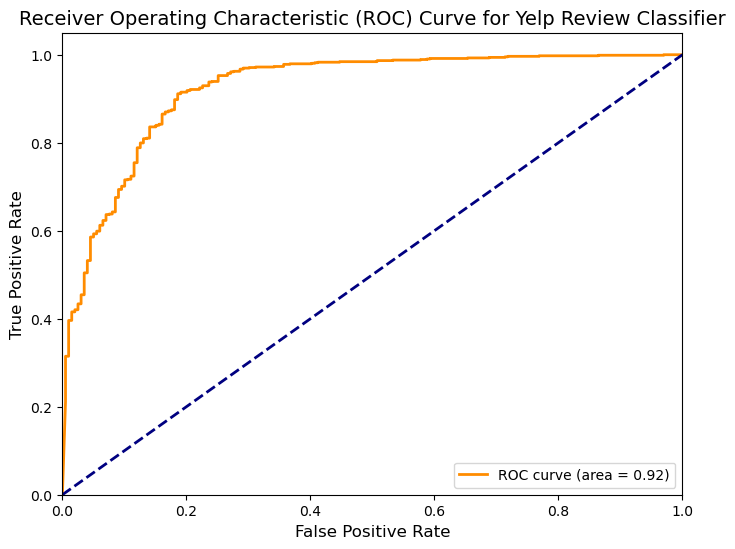

In [29]:
# Calculate the fpr and tpr values for different probability thresholds
fpr, tpr, thresholds = roc_curve(y_test_target, y_test_proba)

roc_auc = auc(fpr, tpr)  # calculate the AUC, which measures the overall performance of the classifier.

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')

# The diagonal line represents a random classifier (AUC = 0.5)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve for Yelp Review Classifier', fontsize=14)
plt.legend(loc="lower right")
plt.show()

## TASK 9: Print the confusion matrix, and calculate sensitivity, specificity, and precision

For both the test and training datasets.  So, print two separate confusion matrices.  For the training dataset, you'll be making predictions on the vectorized X_train data, and then comparing the training predictions against the ground truth.

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

### Test Dataset

In [31]:
confusion_matrix(y_test, y_pred_test)  # print the confusion matrix

array([[127,  72],
       [ 18, 805]])

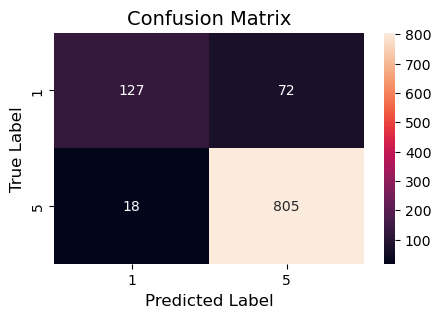

In [32]:
def plot_confustion_matrix(cm):
    classes = ["1", "5"]
    plt.figure(figsize=(5, 3))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)  # display the confusion matrix.  fmt='d' suppresses scientific notation
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.title('Confusion Matrix', fontsize=14)
    
cm = confusion_matrix(y_test, y_pred_test)
plot_confustion_matrix(cm)


# Precision = true positive
# Specificity= true negative

#### Calculate sensitivity and specificity

[Precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall)

* Sensitivity is the true positive rate, aka recall
* Specificity is the true negative rate, aka selectivity
* Precision refers to the percentage of positive predictions that are actually correct.

In [33]:
# how to adjust 

TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

P = TP + FN  # all positives, in this case, 5 stars is considered to be the positive class
N = TN + FP  # all negatives, in this case, 1 star is considered to be the negative class

sensitivity = TP / P
specificity = TN / N
precision   = TP / (TP + FP)

print(f'sensitivity = {round(sensitivity, 2)}, specificity = {round(specificity, 2)}, precision = {round(precision, 2)}')

sensitivity = 0.98, specificity = 0.64, precision = 0.92


In [34]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.88      0.64      0.74       199
           5       0.92      0.98      0.95       823

    accuracy                           0.91      1022
   macro avg       0.90      0.81      0.84      1022
weighted avg       0.91      0.91      0.91      1022



### Training Dataset

In [35]:
y_pred_train = nb_classifier.predict(X_train_dtm)
print(y_pred_train)

[5 5 5 ... 5 1 5]


In [36]:
confusion_matrix(y_train, y_pred_train)  # print the confusion matrix

array([[ 503,   47],
       [  15, 2499]])

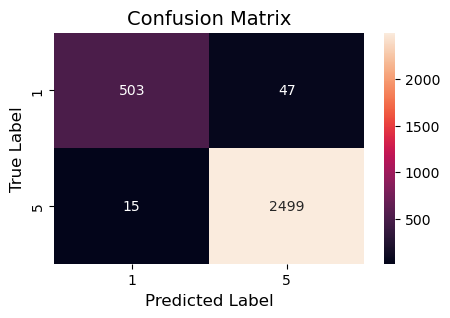

In [37]:
cm = confusion_matrix(y_train, y_pred_train)
# sns.heatmap(cm, annot=True, fmt='d')  # display the confusion matrix.  fmt='d' suppresses scientific notation
plot_confustion_matrix(cm)

The numpy method, ravel(), return a contiguous flattened array.  The confusion matrix, cm, is a numpy.ndarray, so in this context, ravel() is a shortcut for performing:

TN = cm[0][0]<br>
FP = cm[0][1]<br>
FN = cm[1][0]<br>
TP = cm[1][1]


In [38]:
TN, FP, FN, TP = cm.ravel()

P = TP + FN  # all positives, in this case, 5 stars is considered to be the positive class
N = TN + FP  # all negatives, in this case, 1 star is considered to be the negative class

sensitivity = TP / P
specificity = TN / N
precision   = TP / (TP + FP)

print(f'sensitivity = {round(sensitivity, 2)}, specificity = {round(specificity, 2)}, precision = {round(precision, 2)}')

sensitivity = 0.99, specificity = 0.91, precision = 0.98


In [39]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           1       0.97      0.91      0.94       550
           5       0.98      0.99      0.99      2514

    accuracy                           0.98      3064
   macro avg       0.98      0.95      0.96      3064
weighted avg       0.98      0.98      0.98      3064



## TASK 10: Browse the review text for the false positive and false negatives

In [40]:
# why do we want to read the text?
# does the model have a reason to be mislabeling and misclassifing
# just print the text to check it out.

# Identify false positives (predicted 5 stars, actual 1 star)
s_false_positives = X_test[(y_pred_test == 5) & (y_test == 1)]
print(f'Of the {y_pred_test.shape[0]:,} predictions, there are {s_false_positives.shape[0]} false positives.\n')

# Print text of false positives
print("False Positives:\n")
for index, text in s_false_positives.items():
    print(f"Index: {index}, Review Text:\n{text}")
    print("_" * 80, "\n")

Of the 1,022 predictions, there are 72 false positives.

False Positives:

Index: 1406, Review Text:
From my door, it's a five minute stroll through the greenbelt to Dukes. They have a nice patio. They have enough TVs to show all MLB/NFL/NBA games. They have plenty of shuffleboard and pool tables. Yet, I've only been to Duke's a few times and I am not going back. This place is just bad.

Mixed drinks are poured short and use cheap mixers (such as bottled sour mix for margaritas). They offer a pretty basic beer selection. I think PBR pitchers might be more modestly priced, but that might be only when they're on "special."

The food is pretty bad, even for bar food. And pricey. Sure, the menu is gigantic and I've tried many different items, but I didn't find anything good. Everything seems to be made from "freezer to fryer" or packaged products. I'm not exaggerating: the burger and fries for about $8 is a thin, previously frozen patty with a handful or supermarket fries. I could go on ab

In [41]:
# Identify false negatives (predicted 1 star, actual 5 stars)
s_false_negatives = X_test[(y_pred_test == 1) & (y_test == 5)]
print(f'Of the {y_pred_test.shape[0]:,} predictions, there are {s_false_negatives.shape[0]} false negatives.\n')

# Print text of false negatives
print("\nFalse Negatives:\n")
for index, text in s_false_negatives.items():
    print(f"Index: {index}, Review Text:\n{text}")
    print("_" * 80, "\n")

Of the 1,022 predictions, there are 18 false negatives.


False Negatives:

Index: 2504, Review Text:
I've passed by prestige nails in walmart 100s of times but never really thought of having a pedicure there (even though they are always busy!) As I stared at my feet, long overdue for a pedicure, I thought it was about time to try them...since walmart rarely let's me down why should the nail salon inside?

To my surprise I got a wonderful pedicure or $23 not too bad this day in age...my to mention it was just as good as going to the more upscale salon just across the street! 

I'm glad to be the first to review them they deserve it! Now if only they did facials at walmart and hair I'd be set!
________________________________________________________________________________ 

Index: 4646, Review Text:
Wow, I am very impressed. The store is very big, and they seem to have it all - even the hard to find, odd items. It looks like everyone can shop here.

The store is mapped out and sectione

In [42]:
y_test[:5]

1406    1
1792    5
7723    5
2416    5
6111    5
Name: stars, dtype: int64

## TASK 11: Change the threshold to balance sensitivity and specificity

In the performance metrics of the training dataset.

In [43]:
y_pred_proba = nb_classifier.predict_proba(X_train_dtm)[:, 1]  # get the predicted probabilities for the positive class

In [44]:
thresholds = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95]

for custom_threshold in thresholds:    
    y_train_pred = np.where(y_pred_proba > custom_threshold, 5, 1)  # apply the threshold to get the binary predictions
    cm = confusion_matrix(y_train, y_train_pred)

    TP = cm[1][1]
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]

    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    
    print(f'Threshold: {custom_threshold}, Sensitivity: {sensitivity:.2f}, Specificity: {specificity:.2f}')

Threshold: 0.5, Sensitivity: 0.99, Specificity: 0.91
Threshold: 0.6, Sensitivity: 0.99, Specificity: 0.92
Threshold: 0.7, Sensitivity: 0.99, Specificity: 0.94
Threshold: 0.8, Sensitivity: 0.99, Specificity: 0.96
Threshold: 0.9, Sensitivity: 0.98, Specificity: 0.96
Threshold: 0.95, Sensitivity: 0.97, Specificity: 0.97


## TASK 12: Assign sentiment classes

Restricting our training and test datasets solely to 1- and 5-star reviews may be overly restrictive, leading to a reduction in the quantity of data available for model training and evaluation. Considering a broader range of reviews could provide a more comprehensive understanding of the data and potentially enhance the model's ability to generalize across various sentiments and rating levels.

For each review in the DataFrame, assign the sentiment class to split the reviews on positive or negative, and create a target label.
* rating = 4.0 and 5.0 --> class = 1
* rating <= 2.0 --> class = 0
* rating = 3.0 --> do not include, neutral assessment

The final DataFrame should only have the following columns:  ['date', 'stars', 'text', 'sentiment'], and display the last 15 reviews in the DataFrame.

In [45]:
df_yelp_filtered = df_yelp[df_yelp['stars'] != 3][['date', 'stars', 'text']].copy()
df_yelp_filtered['sentiment'] = df_yelp_filtered['stars'].apply(lambda rating : 1 if rating >= 4.0 else 0)

print(df_yelp_filtered.shape)
df_yelp_filtered.tail(15)

(8539, 4)


,date,stars,text,sentiment
9984,2012-02-12,1,Went last night to Whore Foods to get basics t...,0
9985,2012-10-17,4,Awesome food! Little pricey but delicious. Lov...,1
9986,2012-03-31,4,I came here in December and look forward to my...,1
9987,2012-04-07,1,The food is delicious. The service: discrimi...,0
9988,2012-06-02,4,For our first time we had a great time! Our se...,1
9989,2011-10-01,5,Great food and service! Country food at its best!,1
9990,2011-10-03,5,Yes I do rock the hipster joints. I dig this ...,1
9991,2011-12-05,5,Only 4 stars? \r\n\r\n(A few notes: The folks ...,1
9992,2009-03-10,5,I'm not normally one to jump at reviewing a ch...,1
9993,2011-06-27,4,"Judging by some of the reviews, maybe I went o...",1


## TASK 13 (BONUS): Use a RandomForestClassifier to predict the star rating for the testing set, and calculate accuracy

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train_dtm, y_train)

# Make predictions
y_pred_test = rf_classifier.predict(X_test_dtm)

# Evaluate performance
print(metrics.accuracy_score(y_test, y_pred_test))         # overall accuracy
print(metrics.classification_report(y_test, y_pred_test))  # detailed per-class metrics

0.8796477495107632
              precision    recall  f1-score   support

           1       0.93      0.41      0.57       199
           5       0.87      0.99      0.93       823

    accuracy                           0.88      1022
   macro avg       0.90      0.70      0.75      1022
weighted avg       0.89      0.88      0.86      1022



In [48]:
rf_classifier = RandomForestClassifier(criterion='gini')

rf_classifier.fit(X_train_dtm, y_train)

# Make predictions
y_pred_test = rf_classifier.predict(X_test_dtm)

# Evaluate performance
print(metrics.accuracy_score(y_test, y_pred_test))         # overall accuracy
print(metrics.classification_report(y_test, y_pred_test))  # detailed per-class metrics

0.8913894324853229
              precision    recall  f1-score   support

           1       0.95      0.47      0.63       199
           5       0.89      0.99      0.94       823

    accuracy                           0.89      1022
   macro avg       0.92      0.73      0.78      1022
weighted avg       0.90      0.89      0.88      1022



## TASK 14 (BONUS): 5-class classification on the original DataFrame

In [49]:
# Separate features and the target
X = df_yelp['text']
y = df_yelp['stars']

# Split into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Vectorize the data
count_vect = CountVectorizer(stop_words='english')
X_train_dtm = count_vect.fit_transform(X_train)
X_test_dtm = count_vect.transform(X_test)

# Train the classifier model
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_dtm, y_train)

# Make predictions
y_pred_test = nb_classifier.predict(X_test_dtm)

# Evaluate performance
print(metrics.accuracy_score(y_test, y_pred_test))         # overall accuracy
print(metrics.classification_report(y_test, y_pred_test))  # detailed per-class metrics

0.492
              precision    recall  f1-score   support

           1       0.62      0.30      0.41       181
           2       0.40      0.11      0.18       221
           3       0.39      0.12      0.18       374
           4       0.45      0.74      0.56       898
           5       0.60      0.53      0.56       826

    accuracy                           0.49      2500
   macro avg       0.49      0.36      0.38      2500
weighted avg       0.49      0.49      0.46      2500



In [ ]:
# NLP is complex and NLP problems are hard to solve. It often takes time. 
# NLP projects are time and resource intensive.
# Human language has nuance and complexity. 